# Project 2 - House Prices


## Description
In this project we are given two data sets, each containing information on 1,459 houses in a single city (Ames, Iowa), including 79 variables for each house. The first data set is intended for training our models, while the second is for testing them. Our goal is to predict the price of each home using regression models.

The data sets may be downloaded from https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

## Considerations
Before modelling the data, we must:
1. Frame the problem and look at the big picture.
1. Prepare the data, checking for faulty entries (empty cells or cells with "nan"s or other values that do not make sense in the context of the problem) and normalizing it if necessary.
1. Explore the data with visual tools to gain some insight and intuition.

While modelling the data, we must:
1. Explore many different models and shortlist the best ones.
1. Fine-tune our models, and possibly combine more than one to greater effect.

### Installing and importing necessary modules

In [ ]:
pip install pandas seaborn matplotlib # Restart the Python kernel after installation!

In [1]:
import pandas as pd # For creating dataframes and calculating correlation matrices.
from pandas.api.types import CategoricalDtype # For correctly setting some dataframe colummns as being of categorical type

from pathlib import Path # For defining the path directory in which the data is stored

import seaborn as sn            # For creating visual representations
import matplotlib.pyplot as plt # of correlation matrices.

### Importing the data

In [2]:
data_dir = Path("~/Data/House Prices/") # Directory in which to look for the data

df_train = pd.read_csv(data_dir / "train.csv") # Import training data as a pandas dataframe 
df_test = pd.read_csv(data_dir / "test.csv") # Import test data file as a pandas dataframe
df_concat = pd.concat([df_train, df_test]) # Concatenate dataframes to process them simultaneously

### Inspecting the data

In [3]:
df_concat.BldgType.unique() # Check the dataframe's categorical attributes for errors

# Typos:
# MSZoning has a "C (all)" value instead of "C"
# Neighborhood has a "NAmes" value instead of "Names"
# BldgType has a "2fmCon" value instead of "2FmCon", a "Duplex" value instead of "Duplx"
# BldgType has "Twnhs" value which could possible be "TwnhsI" (or not?)!
# HouseStyle has a "SLv1" value instead of "SLvl"
# Exterior2nd has a "Wd Shng" value instead of "WdShing" and a "Brk Cmn" value instead of "BrkComm"

# nans:
# MSZoning has a "nan" value not found in data_description.txt!
# Alley has a "nan" value instead of "NA"!
# Utilities has a "nan" value not found in data_description.txt!
# Exterior1st has a "nan" value not found in data_description.txt!
# Exterior2nd has a "nan" value not found in data_description.txt!
# MasVnrType has a "nan" value not found in data_description.txt!
# BsmtQual has a "nan" value not found in data_description.txt!
# BsmtCond has a "nan" value not found in data_description.txt!
# BsmtExposure has a "nan" value not found in data_description.txt!
# BsmtFinType1 has a "nan" value not found in data_description.txt!
# BsmtFinType2 has a "nan" value not found in data_description.txt!
# Electrical has a "nan" value not found in data_description.txt!
# BsmtFullBath has a "nan" value not found in data_description.txt!
# BsmtHalfBath has a "nan" value not found in data_description.txt!
# Functional has a "nan" value not found in data_description.txt! <- the text document says to "Assume typical unless deductions are warranted"
# FireplaceQu has a "nan" value not found in data_description.txt!
# GarageType has a "nan" value not found in data_description.txt!
# GarageYrBlt has a "nan" value not found in data_description.txt!
# GarageFinish has a "nan" value instead of "NA"!
# GarageQual has a "nan" value instead of "NA"!
# GarageCond has a "nan" value instead of "NA"!
# PoolQC has a "nan" value instead of "NA"!
# Fence has a "nan" value instead of "NA"!
# MiscFeature has a "nan" value instead of "NA"!
# SaleType has a "nan" value not found in data_description.txt!

# Incorrect data types:
# MSSubClass has "int" data type, but the numbers are just identifiers (nominal)
# MSZoning has "object" data type
# Street has "object" data type with a 2 degree scale
# Alley has "object" data type with a 3 degree scale
# LotShape has "object" data type
# LandContour has "object" data type
# Utilities has "object" data type with a 4 degree scale
# LotConfig has "object" data type
# LandSlope has "object" data type
# Neighborhood has "object" data type
# Condition1 has "object" data type
# Condition2 has "object" data type
# BldgType has "object" data type
# HouseStyle has "object" data type
# OverallQual has "int" data type, but represents an ordered categorical feature
# OverallCond has "int" data type, but represents an ordered categorical feature
# RoofStyle has "object" data type
# RoofMatl has "object" data type
# Exterior1st has "object" data type
# Exterior2nd has "object" data type
# MasVnrType has "object" data type
# ExterQual has "object" data type with a 5 degree scale
# ExterCond has "object" data type with a 5 degree scale
# Foundation has "object" data type
# BsmtQual has "object" data type with a 5 degree scale
# BsmtCond has "object" data type with a 6 degree scale
# BsmtExposure has "object" data type with a 5 degree scale
# BsmtFinType1 has "object" data type with a 7 degree scale
# BsmtFinType2 has "object" data type with a 7 degree scale
# Heating has "object" data type
# HeatingQC has "object" data type with a 5 degree scale
# CentralAir has "object" data type
# Electrical has "object" data type
# BsmtFullBath has a "float" data type, whereas "int" would be more appropriate
# BsmtHalfBath has a "float" data type, whereas "int" would be more appropriate
# KitchenQual has "object" data type
# Functional has "object" data type with an 8 degree scale
# FireplaceQu has "object" data type with a 6 degree scale
# GarageType has "object" data type
# GarageFinish has "object" data type with a 4 degree scale
# GarageCars has a "float" data type, whereas "int" would be more appropriate
# GarageQual has "object" data type with a 6 degree scale
# GarageCond has "object" data type with a 6 degree scale
# PavedDrive has "object" data type with a 3 degree scale
# PoolQC has "object" data type with a 5 degree scale

# No further inconsistencies were found in the numerical data

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

### Correcting typos

In [4]:
def correct_typos(df): # Function for correcting errors detected in the data sets when compared to the data_description.txt file
    # Correcting typos
    df["MSZoning"] = df["MSZoning"].replace({"C (all)": "C"})
    df["Neighborhood"] = df["Neighborhood"].replace({"NAmes": "Names"})
    df["BldgType"] = df["BldgType"].replace({"2fmCon": "2FmCon"})
    df["BldgType"] = df["BldgType"].replace({"Duplex": "Duplx"})
    df["HouseStyle"] = df["HouseStyle"].replace({"SLv1": "SLvl"})
    df["Exterior2nd"] = df["Exterior2nd"].replace({"Wd Shng": "WdShing"})
    df["Exterior2nd"] = df["Exterior2nd"].replace({"Brk Cmn": "BrkComm"})
    # Changing names that start with numbers, which can be hard to work with in Python
    df.rename(columns={
        "1stFlrSF": "FirstFlrSF",
        "2ndFlrSF": "SecondFlrSF",
        "3SsnPorch": "ThreeSeasonPorch",
    }, inplace=True)
    return df

correct_typos(df_concat)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


### Correcting datatypes and labeling missing values

In [5]:
nominal_features = ["MSSubClass", "MSZoning", "Street", "Alley", "Utilities", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "BsmtFinType1", "BsmtFinType2", "BsmtExposure", "Heating", "CentralAir", "Electrical", "Functional", "GarageType", "GarageFinish", "PavedDrive", "Fence", "MiscFeature", "SaleType", "SaleCondition"]

ten_levels = list(range(1,11))
six_levels = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
five_levels = six_levels[1:6]

scales = { # Dictionary with scales corresponding to each ordered feature
    "OverallQual" : ten_levels,
    "OverallCond" : ten_levels,
    "ExterQual" : five_levels,
    "ExterCond" : five_levels,
    "BsmtQual" : six_levels,
    "BsmtCond" : six_levels,
    "HeatingQC" : five_levels,
    "KitchenQual" : five_levels,
    "FireplaceQu" : six_levels,
    "GarageQual" : six_levels,
    "GarageCond" : six_levels,
    "PoolQC" : [six_levels[0]] + six_levels[2:6] # equal to ["Na", "Fa", "TA", "Gd", "Ex"]
}

def correct_datatypes(df): # Function for correcting errors detected in data types
    # Encode nominal features as such
    for nom_feature in nominal_features: # For each nominal feature
        df[nom_feature] = df[nom_feature].astype("category") # Set datatype as 'category'
    for ord_feature, scale in scales.items(): # For each ordered feature and corresponding scale
        df[ord_feature] = df[ord_feature].astype(CategoricalDtype(scale, ordered=True))
    return df

def label_missing_values(df):
    for name in df.select_dtypes("category"):
        df[name] = df[name].cat.add_categories("NaN").fillna("NaN") # Adds an 'NaN' value to cells with no input
    return df

label_missing_values(correct_datatypes(df_concat))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


### Visualizing value distributions in columns with missing values

In [6]:
df_concat.columns # Show dataframe columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Paved

<AxesSubplot:ylabel='None'>

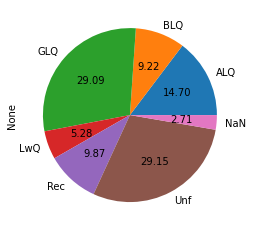

In [7]:
# Visualize value distribution for dataframe attributes with categorical data
df_concat.groupby('BsmtFinType1').size().plot(kind='pie', autopct='%.2f')

# 'Street' attribute is 99.59% 'Pave'
# 'Alley' attribute is 93.22% 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'Utilities' attribute is 99.90% 'AllPub'
# 'Condition2' attribute is 98.97% 'Norm'
# 'BldgType' should probably have 'Twnhs' values changed to 'TwnhsI'
# 'RoofMatl' attribute is 98.53% 'CompShg'
# 'BsmtExposure' attribute is 2.81% 'NaN'; changing this to 'No' would change the distribution the least
# 'BsmtFinType1' attribute is 2.71% 'NaN', however, changing this to a particular value might alter the distribution!
# 'BsmtFinType2' attribute is 2.74% 'NaN'; changing this to 'Unf' would change the distribution the least
# 'Heating' attribute is 98,46% GasA
# 'CentralAir' attribute is 0.00% 'NaN'; changing this value to 'Y' would change the distribution the least
# 'Electrical' attribute is 0.03% 'NaN'; changing this to 'SBrkr' would change the distribution the least
# 'KitchenQual' attribute is 0.00% 'NaN'; changing this to 'TA' would change the distribution the least
# 'Functional' attribute is 93.08% 'Typ'
# 'FireplaceQu' attribute is 48.65 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'GarageType' attribute is 5.38% 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'GarageFinish' attribute is 5.45% 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'GarageQual' attribute is 5.45% 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'GarageCond' attribute is 5.45% 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'PavedDrive' attribute is 0.00% 'NaN'' changing this value to 'Y' would change the distribution the least
# 'PoolQC' attribute is 99.66% 'NaN'; these should probably be changed to 'NA' since 'PoolArea' attribute is 99.55% '0'
# 'Fence' attribute is 80.44% 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'MiscFeature' attribute is 96.40% 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'SaleType' attribute is 0.03% 'NaN'; changing this to 'WD' would change the distribution the least

### Handling missing values

<AxesSubplot:ylabel='None'>

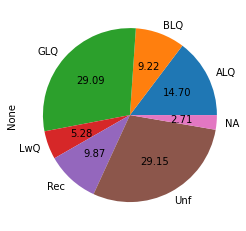

In [8]:
NaNtoNA = ["Alley", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature", "BsmtFinType1"]
NaNtoOther = {'BsmtExposure' : 'No', 'BsmtFinType2' : 'Unf', 'CentralAir' : 'Y', 'Electrical' : 'SBrkr', 'KitchenQual' : 'TA', 'PavedDrive' : 'Y', 'SaleType' : 'WD'}

def handle_missing_values(df):
    df_concat['BldgType'].replace({'Twnhs' : 'TwnhsI'})
    for name in NaNtoNA:
        df[name] = df[name].replace({'NaN' : 'NA'})
    for name, value in NaNtoOther.items():
        df[name] = df[name].replace({'NaN' : value})    
    return df

df_handled = handle_missing_values(df_concat)
df_handled.groupby('BsmtFinType1').size().plot(kind='pie', autopct='%.2f')

### Encoding categorical data

In [9]:
categorical_columns = list(set(df_handled.select_dtypes(exclude=["number"])))
categorical_columns

['BsmtQual',
 'MSSubClass',
 'BsmtFinType1',
 'MasVnrType',
 'ExterQual',
 'MiscFeature',
 'SaleType',
 'LotShape',
 'CentralAir',
 'FireplaceQu',
 'GarageQual',
 'MSZoning',
 'BsmtFinType2',
 'LotConfig',
 'Heating',
 'LandContour',
 'Exterior1st',
 'BsmtExposure',
 'RoofMatl',
 'KitchenQual',
 'Utilities',
 'BldgType',
 'OverallCond',
 'LandSlope',
 'Alley',
 'Condition2',
 'Functional',
 'GarageCond',
 'SaleCondition',
 'Electrical',
 'Condition1',
 'PoolQC',
 'GarageType',
 'Exterior2nd',
 'PavedDrive',
 'Street',
 'ExterCond',
 'Neighborhood',
 'OverallQual',
 'HeatingQC',
 'HouseStyle',
 'BsmtCond',
 'Foundation',
 'Fence',
 'GarageFinish',
 'RoofStyle']

In [10]:
df_prepared = pd.get_dummies(df_handled, columns = categorical_columns) # OneHotEncoder for categorical columns

In [11]:
df_prepared_train = df_prepared.iloc[:1460,:]
df_prepared_test = df_prepared.iloc[1461:,:]

df_prepared_train

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_NA,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_NaN
0,1,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,...,1,0,0,0,1,0,0,0,0,0
1,2,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,1,0,0,0,1,0,0,0,0,0
2,3,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,...,1,0,0,0,1,0,0,0,0,0
3,4,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,...,0,1,0,0,1,0,0,0,0,0
4,5,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,1999,2000,0.0,0.0,0.0,953.0,953.0,...,1,0,0,0,1,0,0,0,0,0
1456,1457,85.0,13175,1978,1988,119.0,790.0,163.0,589.0,1542.0,...,0,1,0,0,1,0,0,0,0,0
1457,1458,66.0,9042,1941,2006,0.0,275.0,0.0,877.0,1152.0,...,1,0,0,0,1,0,0,0,0,0
1458,1459,68.0,9717,1950,1996,0.0,49.0,1029.0,0.0,1078.0,...,0,1,0,0,0,0,1,0,0,0


### Selecting relevant variables

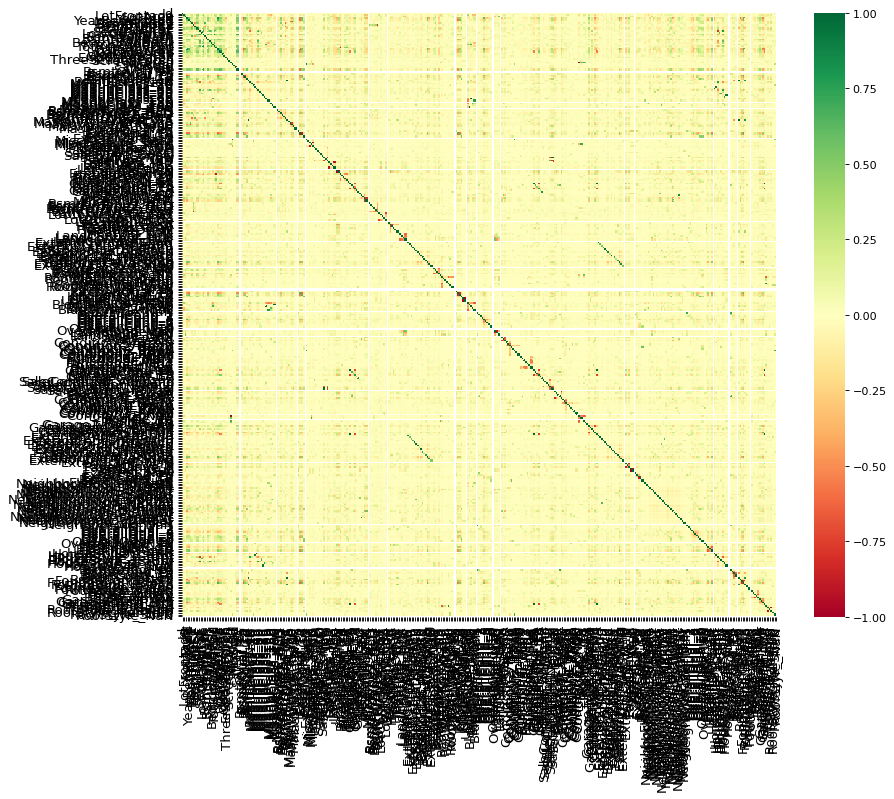

In [13]:
def plotCM(df): # Function for creating and plotting the correlation matrix of a dataframe
    plt.figure(figsize=(12,10), dpi= 80)
    sn.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0)#, annot=True)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
plotCM(df_prepared_train) # Plot the correlation matrix for the training data

### Further work
Some further improvements to the code include the following:
1. Create a function which, given a Pandas dataframe, returns an array of the Ids of all of the columns which have a nan value.